<a href="https://colab.research.google.com/github/data-to-insights/COLLECTIVE2_TRADING/blob/master/Project2_Pani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 2
# INVESTMENT STRATEGIES PORTAL

## Cody Sifford
## David Frazier
## John Hernandez
## Pani Maddi

In [2]:
#!pip install simfin

     |████████████████████████████████| 61kB 3.4MB/s 


# IMPORTS

In [3]:
# IMPORTS
import pandas as pd
import numpy as np
# Import the main functionality from the SimFin Python API.
import simfin as sf

# Import names used for easy access to SimFin's data-columns.
from simfin.names import *

# Imports for charting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from plotly.offline import iplot
import plotly.graph_objs as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Version of the SimFin Python API.
sf.__version__

'0.7.0'

## DATA DIRECTORY

In [5]:
sf.set_data_dir('~/simfin_data/')

## API KEY

In [ ]:
sf.set_api_key(api_key='free')

In [ ]:
# sf.load_api_key(path='~/simfin_api_key.txt', default_key='free')

## DATA LOADS

In [ ]:
df1 = sf.load(dataset='income', variant='annual', market='us')

Dataset "us-income-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [ ]:
df1.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2008,FY,2008-10-31,2009-01-05,2010-12-20,363000000.0,371000000.0,5.774000e+09,-2.578000e+09,3.196000e+09,-2.401000e+09,-1.697000e+09,-704000000.0,NaN,7.950000e+08,20000000.0,-10000000.0,815000000,0.0,815000000,-122000000.0,693000000,NaN,693000000,693000000
1,A,45846,USD,2009,FY,2009-10-31,2009-12-21,2011-12-16,346000000.0,346000000.0,4.481000e+09,-2.189000e+09,2.292000e+09,-2.245000e+09,-1.603000e+09,-642000000.0,NaN,4.700000e+07,-40000000.0,-59000000.0,7000000,0.0,7000000,-38000000.0,-31000000,NaN,-31000000,-31000000
2,A,45846,USD,2010,FY,2010-10-31,2010-12-08,2012-12-20,347000000.0,353000000.0,5.444000e+09,-2.514000e+09,2.930000e+09,-2.364000e+09,-1.752000e+09,-612000000.0,NaN,5.660000e+08,-6000000.0,-76000000.0,560000000,132000000.0,692000000,-8000000.0,684000000,NaN,684000000,684000000
3,A,45846,USD,2011,FY,2011-10-31,2011-12-16,2013-12-19,347000000.0,355000000.0,6.615000e+09,-3.086000e+09,3.529000e+09,-2.458000e+09,-1.809000e+09,-649000000.0,NaN,1.071000e+09,-39000000.0,-72000000.0,1032000000,NaN,1032000000,-20000000.0,1012000000,NaN,1012000000,1012000000
4,A,45846,USD,2012,FY,2012-10-31,2012-12-20,2014-12-22,348000000.0,353000000.0,6.858000e+09,-3.254000e+09,3.604000e+09,-2.485000e+09,-1.817000e+09,-668000000.0,NaN,1.119000e+09,-76000000.0,-92000000.0,1043000000,NaN,1043000000,110000000.0,1153000000,NaN,1153000000,1153000000


In [ ]:
df2 = sf.load(dataset='income', variant='annual', market='us',
              index=[TICKER, REPORT_DATE],
              parse_dates=[REPORT_DATE, PUBLISH_DATE, RESTATED_DATE])

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!


In [ ]:
df2.head()

SimFinId Currency  ...  Net Income Net Income (Common)
Ticker Report Date                     ...                                
A      2008-10-31      45846      USD  ...   693000000           693000000
       2009-10-31      45846      USD  ...   -31000000           -31000000
       2010-10-31      45846      USD  ...   684000000           684000000
       2011-10-31      45846      USD  ...  1012000000          1012000000
       2012-10-31      45846      USD  ...  1153000000          1153000000

[5 rows x 26 columns]

In [ ]:
df2.loc['MSFT']

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Report Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-06-30,59265,USD,2009,FY,2009-07-22,2011-07-28,8.945000e+09,8.996000e+09,5.843700e+10,-1.215500e+10,4.628200e+10,-2.591900e+10,-1.690900e+10,-9.010000e+09,NaN,2.036300e+10,-5.420000e+08,NaN,19821000000,NaN,19821000000,-5.252000e+09,14569000000,NaN,14569000000,14569000000
2010-06-30,59265,USD,2010,FY,2010-07-30,2012-07-26,8.813000e+09,8.927000e+09,6.248400e+10,-1.239500e+10,5.008900e+10,-2.599100e+10,-1.727700e+10,-8.714000e+09,NaN,2.409800e+10,9.150000e+08,NaN,25013000000,0.000000e+00,25013000000,-6.253000e+09,18760000000,NaN,18760000000,18760000000
2011-06-30,59265,USD,2011,FY,2011-07-28,2013-07-30,8.490000e+09,8.593000e+09,6.994300e+10,-1.557700e+10,5.436600e+10,-2.720500e+10,-1.816200e+10,-9.043000e+09,NaN,2.716100e+10,9.100000e+08,NaN,28071000000,0.000000e+00,28071000000,-4.921000e+09,23150000000,NaN,23150000000,23150000000
2012-06-30,59265,USD,2012,FY,2012-07-26,2014-07-31,8.396000e+09,8.506000e+09,7.372300e+10,-1.753000e+10,5.619300e+10,-2.823700e+10,-1.842600e+10,-9.811000e+09,NaN,2.795600e+10,5.040000e+08,NaN,28460000000,-6.193000e+09,22267000000,-5.289000e+09,16978000000,NaN,16978000000,16978000000
2013-06-30,59265,USD,2013,FY,2013-07-30,2015-07-31,8.375000e+09,8.470000e+09,7.784900e+10,-2.038500e+10,5.746400e+10,-3.070000e+10,-2.028900e+10,-1.041100e+10,NaN,2.676400e+10,2.880000e+08,NaN,27052000000,0.000000e+00,27052000000,-5.189000e+09,21863000000,NaN,21863000000,21863000000
2014-06-30,59265,USD,2014,FY,2014-07-31,2016-07-28,8.299000e+09,8.399000e+09,8.683300e+10,-2.707800e+10,5.975500e+10,-3.186900e+10,-2.048800e+10,-1.138100e+10,NaN,2.788600e+10,6.100000e+07,NaN,27947000000,-1.270000e+08,27820000000,-5.746000e+09,22074000000,NaN,22074000000,22074000000
2015-06-30,59265,USD,2015,FY,2015-07-31,2017-08-02,8.177000e+09,8.254000e+09,9.358000e+10,-3.303800e+10,6.054200e+10,-3.237000e+10,-2.032400e+10,-1.204600e+10,NaN,2.817200e+10,3.460000e+08,NaN,28518000000,-1.001100e+10,18507000000,-6.314000e+09,12193000000,NaN,12193000000,12193000000
2016-06-30,59265,USD,2016,FY,2016-07-28,2018-08-03,7.925000e+09,8.013000e+09,9.115400e+10,-3.278000e+10,5.837400e+10,-3.118600e+10,-1.919800e+10,-1.198800e+10,NaN,2.718800e+10,-4.390000e+08,NaN,26749000000,-1.110000e+09,25639000000,-5.100000e+09,20539000000,NaN,20539000000,20539000000
2017-06-30,59265,USD,2017,FY,2017-07-27,2018-08-03,7.746000e+09,7.832000e+09,9.657100e+10,-3.426100e+10,6.231000e+10,-3.297900e+10,-1.994200e+10,-1.303700e+10,NaN,2.933100e+10,8.760000e+08,NaN,30207000000,-3.060000e+08,29901000000,-4.412000e+09,25489000000,NaN,25489000000,25489000000


In [ ]:
df2.loc['MSFT'][REVENUE]

Report Date
2009-06-30    5.843700e+10
2010-06-30    6.248400e+10
2011-06-30    6.994300e+10
2012-06-30    7.372300e+10
2013-06-30    7.784900e+10
2014-06-30    8.683300e+10
2015-06-30    9.358000e+10
2016-06-30    9.115400e+10
2017-06-30    9.657100e+10
2018-06-30    1.103600e+11
Name: Revenue, dtype: float64

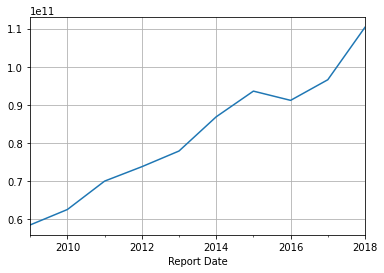

In [ ]:
df2.loc['MSFT'][REVENUE].plot(grid=True)

## INCOME STATEMENTS

In [ ]:
df_income = sf.load_income(variant='annual', market='us')

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!


In [ ]:
df_income.head()

SimFinId Currency  ...  Net Income Net Income (Common)
Ticker Report Date                     ...                                
A      2008-10-31      45846      USD  ...   693000000           693000000
       2009-10-31      45846      USD  ...   -31000000           -31000000
       2010-10-31      45846      USD  ...   684000000           684000000
       2011-10-31      45846      USD  ...  1012000000          1012000000
       2012-10-31      45846      USD  ...  1153000000          1153000000

[5 rows x 26 columns]

## BALANCE SHEETS

In [ ]:
df_balance = sf.load_balance(variant='annual', market='us')

Dataset "us-balance-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [ ]:
df_balance.head()

SimFinId Currency  ...  Total Equity Total Liabilities & Equity
Ticker Report Date                     ...                                         
A      2008-10-31      45846      USD  ...  2.559000e+09                 7007000000
       2009-10-31      45846      USD  ...  2.514000e+09                 7612000000
       2010-10-31      45846      USD  ...  3.236000e+09                 9696000000
       2011-10-31      45846      USD  ...  4.316000e+09                 9057000000
       2012-10-31      45846      USD  ...  5.185000e+09                10536000000

[5 rows x 28 columns]

## CASH FLOW STATEMENTS

In [ ]:
df_cashflow = sf.load_cashflow(variant='annual', market='us')

Dataset "us-cashflow-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [ ]:
df_cashflow.head()

SimFinId  ... Net Change in Cash
Ticker Report Date            ...                   
A      2008-10-31      45846  ...         -421000000
       2009-10-31      45846  ...         1074000000
       2010-10-31      45846  ...          170000000
       2011-10-31      45846  ...          878000000
       2012-10-31      45846  ...        -1174000000

[5 rows x 26 columns]

## Report Date vs Publish Date vs Restated Date

In [ ]:
df_income2 = sf.load_income(variant='annual', market='us',index=[TICKER, PUBLISH_DATE])

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!


In [ ]:
df_income2.head()

SimFinId Currency  ...  Net Income Net Income (Common)
Ticker Publish Date                     ...                                
A      2009-01-05       45846      USD  ...   693000000           693000000
       2009-12-21       45846      USD  ...   -31000000           -31000000
       2010-12-08       45846      USD  ...   684000000           684000000
       2011-12-16       45846      USD  ...  1012000000          1012000000
       2012-12-20       45846      USD  ...  1153000000          1153000000

[5 rows x 26 columns]

In [ ]:
df_income3 = sf.add_date_offset(df=df_income, date_index=REPORT_DATE, offset=pd.DateOffset(days=90))

In [ ]:
df_income3.head()

SimFinId Currency  ...  Net Income Net Income (Common)
Ticker Report Date                     ...                                
A      2009-01-29      45846      USD  ...   693000000           693000000
       2010-01-29      45846      USD  ...   -31000000           -31000000
       2011-01-29      45846      USD  ...   684000000           684000000
       2012-01-29      45846      USD  ...  1012000000          1012000000
       2013-01-29      45846      USD  ...  1153000000          1153000000

[5 rows x 26 columns]

## TRAILING 12 MONTHS

In [ ]:
df_income_ttm = sf.load_income(variant='ttm', market='us')

Dataset "us-income-ttm" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [ ]:
df_income_ttm.head()

SimFinId Currency  ...  Net Income Net Income (Common)
Ticker Report Date                     ...                                
A      2010-07-31      45846      USD  ...   417000000           417000000
       2010-10-31      45846      USD  ...   684000000           684000000
       2011-01-31      45846      USD  ...   798000000           798000000
       2011-04-30      45846      USD  ...   890000000           890000000
       2011-07-31      45846      USD  ...  1015000000          1015000000

[5 rows x 26 columns]

## BANKS & INSURANCE COMPANIES

In [ ]:
df_income_banks = sf.load_income_banks(variant='annual', market='us')

Dataset "us-income-banks-annual" on disk (0 days old).
- Loading from disk ... Done!


In [ ]:
df_income_banks.head()

SimFinId Currency  ...  Net Income Net Income (Common)
Ticker Report Date                     ...                                
ABCB   2010-12-31     919504      USD  ...    -3989000            -7202000
       2011-12-31     919504      USD  ...    21093000            17852000
       2012-12-31     919504      USD  ...    14435000            10858000
       2013-12-31     919504      USD  ...    20018000            18280000
       2014-12-31     919504      USD  ...    38723000            38437000

[5 rows x 20 columns]

In [ ]:
df_balance_insurance = sf.load_balance_insurance(variant='annual', market='us')

Dataset "us-balance-insurance-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [ ]:
df_balance_insurance.head()

SimFinId Currency  ...  Total Equity Total Liabilities & Equity
Ticker Report Date                     ...                                         
AAME   2010-12-31     450021      USD  ...      82693000                  277566000
       2011-12-31     450021      USD  ...      96277000                  302125000
       2012-12-31     450021      USD  ...     105736000                  320177000
       2013-12-31     450021      USD  ...     101412000                  319381000
       2014-12-31     450021      USD  ...     104655000                  317008000

[5 rows x 24 columns]

In [ ]:
df_cashflow_banks = sf.load_cashflow_banks(variant='annual', market='us')

Dataset "us-cashflow-banks-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [ ]:
df_cashflow_banks.head()

SimFinId  ... Net Change in Cash
Ticker Report Date            ...                   
ABCB   2010-12-31     919504  ...           -6734000
       2011-12-31     919504  ...           -8798000
       2012-12-31     919504  ...           14728000
       2013-12-31     919504  ...           -5994000
       2014-12-31     919504  ...          -97580000

[5 rows x 24 columns]

## SHARE PRICES

In [ ]:
%%time
df_prices_latest = sf.load_shareprices(variant='latest', market='us')

Dataset "us-shareprices-latest" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
CPU times: user 44.4 ms, sys: 7.95 ms, total: 52.3 ms
Wall time: 1.07 s


In [ ]:
df_prices_latest.head()

,,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume
Ticker,Date,,,,,,,,
A,2020-06-26,45846,87.23,85.52,87.560,85.90,85.90,NaN,2225790
AA,2020-06-26,367153,11.61,10.87,11.700,10.93,10.93,NaN,25816642
AAC,2019-11-04,939324,0.40,0.40,0.450,0.45,0.45,NaN,43300
AAL,2020-06-26,68568,13.20,12.13,13.285,12.38,12.38,NaN,108813029
AAMC,2020-06-26,847094,16.58,15.83,16.990,15.83,15.83,NaN,4684


In [ ]:
%%time
df_prices = sf.load_shareprices(variant='daily', market='us')

Dataset "us-shareprices-daily" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
CPU times: user 22.5 s, sys: 3.16 s, total: 25.6 s
Wall time: 31.6 s


In [ ]:
df_prices.head()

SimFinId   Open    Low  ...  Adj. Close  Dividend   Volume
Ticker Date                                ...                               
A      2007-01-03     45846  34.99  34.05  ...       22.85       NaN  2574600
       2007-01-04     45846  34.30  33.46  ...       22.92       NaN  2073700
       2007-01-05     45846  34.30  34.00  ...       22.71       NaN  2676600
       2007-01-08     45846  33.98  33.68  ...       22.63       NaN  1557200
       2007-01-09     45846  34.08  33.63  ...       22.65       NaN  1386200

[5 rows x 8 columns]

In [ ]:
df_prices.shape

(5283832, 8)

In [ ]:
df_prices.groupby(['Ticker']).count()

,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume
Ticker,,,,,,,,
A,3144,3144,3144,3144,3144,3144,30,3144
AA,668,668,668,668,668,668,1,668
AAC,1193,1193,1193,1193,1193,1193,0,1193
AAL,3144,3144,3144,3144,3144,3144,20,3144
AAMC,1646,1646,1646,1646,1646,1646,0,1646
...,...,...,...,...,...,...,...,...
ZUMZ,3144,3144,3144,3144,3144,3144,0,3144
ZVO,2570,2570,2570,2570,2570,2570,0,2570
ZYNE,982,982,982,982,982,982,0,982


In [ ]:
df_prices.loc['MSFT'].head()

,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume
Date,,,,,,,,
2007-01-03,59265,29.91,29.40,30.25,29.86,22.13,NaN,76935100
2007-01-04,59265,29.70,29.44,29.97,29.81,22.09,NaN,45774500
2007-01-05,59265,29.63,29.45,29.75,29.64,21.96,NaN,44607200
2007-01-08,59265,29.65,29.53,30.10,29.93,22.18,NaN,50220200
2007-01-09,59265,30.00,29.73,30.18,29.96,22.20,NaN,44636600


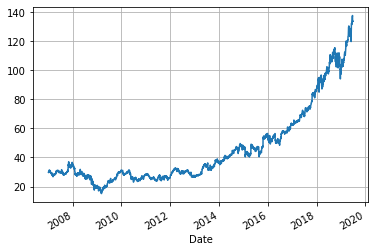

In [ ]:
df_prices.loc['MSFT'][CLOSE].plot(grid=True)

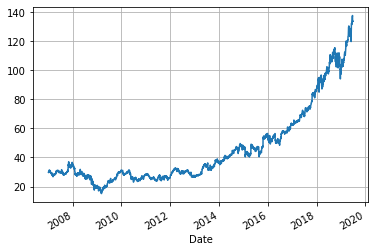

In [ ]:
df_prices.loc['MSFT'][SHARE_PRICE].plot(grid=True)

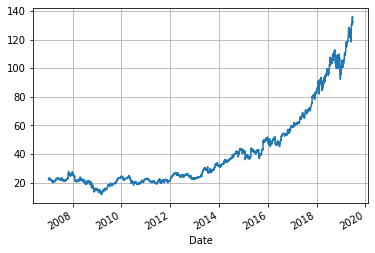

In [ ]:
df_prices.loc['MSFT'][TOTAL_RETURN].plot(grid=True)

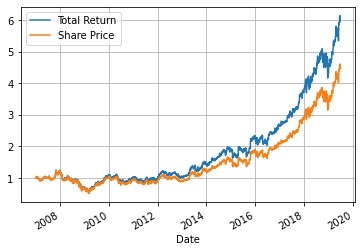

In [ ]:
# Get the relevant data.
df = df_prices.loc['MSFT'][[TOTAL_RETURN, SHARE_PRICE]].copy()

# Rename the columns.
df.rename(columns={TOTAL_RETURN: 'Total Return',
                   SHARE_PRICE: 'Share Price'}, inplace=True)

# Normalize to begin at 1.0
df /= df.values[0]

# Plot it.
df.plot(grid=True)

## COMPANY DETAILS

In [ ]:
df_companies = sf.load_companies(index=TICKER, market='us')

Dataset "us-companies" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [ ]:
df_companies.head()

,SimFinId,Company Name,IndustryId
Ticker,,,
A,45846,AGILENT TECHNOLOGIES INC,106001.0
AA,367153,Alcoa Corp,110004.0
AAC,939324,"AAC Holdings, Inc.",106011.0
AAL,68568,American Airlines Group Inc.,100006.0
AAMC,847094,Altisource Asset Management Corp,104001.0


## SECTOR & INDUSTRY DETAILS

In [ ]:
df_industries = sf.load_industries()

Dataset "industries" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [ ]:
df_industries.head()

,Sector,Industry
IndustryId,,
100001,Industrials,Industrial Products
100002,Industrials,Business Services
100003,Industrials,Engineering & Construction
100004,Industrials,Waste Management
100005,Industrials,Industrial Distribution


## MARKET

In [ ]:
df_income_de = sf.load_income(variant='annual', market='de')

Dataset "de-income-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [ ]:
df_income_de.head()

SimFinId Currency  ...  Net Income Net Income (Common)
Ticker  Report Date                     ...                                
ADS.DE  2018-12-31     847329      EUR  ...  1700000000          1700000000
BAYN.DE 2004-12-31     849702      EUR  ...   603000000           603000000
        2005-12-31     849702      EUR  ...  1597000000          1597000000
        2006-12-31     849702      EUR  ...  1683000000          1683000000
        2007-12-31     849702      EUR  ...  4711000000          4711000000

[5 rows x 26 columns]

## MARKET DETAILS

In [ ]:
df_markets = sf.load_markets()

Dataset "markets" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [ ]:
df_markets.head()

,Market Name,Currency
MarketId,,
ca,Canada,CAD
de,Germany,EUR
it,Italy,EUR
sg,Singapore,SGD
us,United States,USD


In [ ]:
df_markets.loc['us']

Market Name    United States
Currency                 USD
Name: us, dtype: object